In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

 # Part 1 — improving the examples

In [306]:
df.head()

D0,10Y,1Y,20Y,2Y,30Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,2.855,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,2.855,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,2.855,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,2.855,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,2.855,3.802,3.909,3.974,4.019,4.054,4.082,4.106


In [59]:
# Read in the data
df = pd.read_csv("snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
df.head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


In [60]:
df.columns = df.columns.str.replace('J','Y')

In [61]:
df.head()

D0,10Y,1Y,20Y,2Y,30Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


In [62]:
# Plot the boxplot with labels fixed


In [63]:
df['30Y'].fillna(df['30Y'].median(),inplace=True)

In [74]:
df.isnull().sum()

D0
10Y    0
1Y     0
20Y    0
2Y     0
30Y    0
3Y     0
4Y     0
5Y     0
6Y     0
7Y     0
8Y     0
9Y     0
dtype: int64

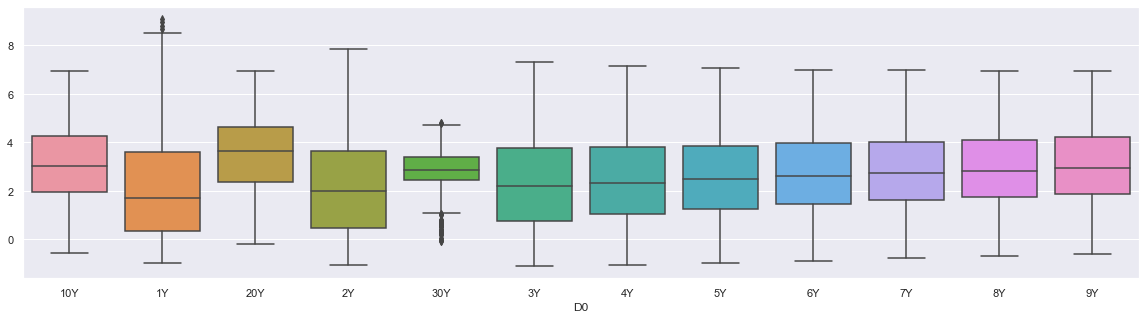

In [80]:
# Exercise: Fix the x-axis labels -- they should say 1Y, 2Y, etc.
plt.figure(figsize=(20,5))
sns.boxplot(data = df)


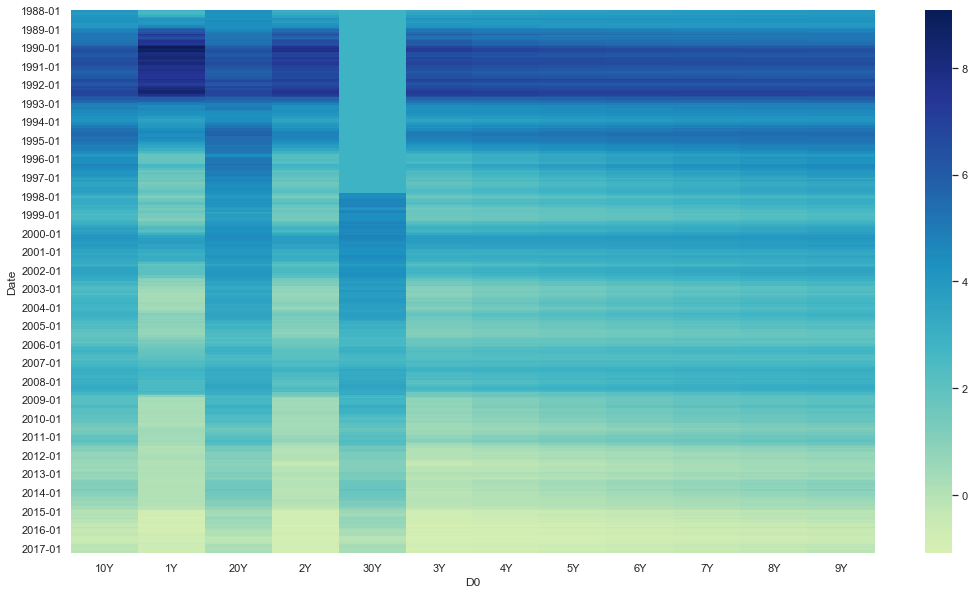

In [88]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
 # Exercise: fix the x labels -- they should be 1Y, 2Y, etc
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, yticklabels=labels, center=df.stack().mean(), cmap='YlGnBu')


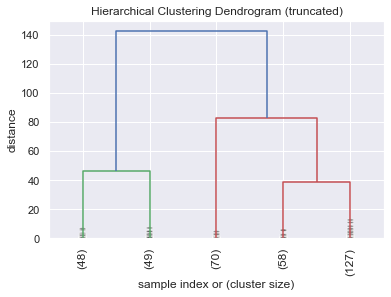

In [89]:
 # dendrograms with labels fixed

from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(df,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()   

 # Part 2 — work with new data

In [307]:
df1 = pd.read_csv("snb-data-zimoma-en-all-20170502_1430.csv")
df1.head()

,Date,D0,Value
0,1972-01,SARON,NaN
1,1972-01,1TGT,0.0
2,1972-01,EG3M,NaN
3,1972-01,1M,NaN
4,1972-01,3M0,NaN


In [92]:
 # The natural order of duration is ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
pd.unique(df1['D0'])

array(['SARON', '1TGT', 'EG3M', '1M', '3M0', '6M', '12M', '3M1', '3M2',
       '3M3', '3M4'], dtype=object)

In [93]:
# line chart of 1TGT series

In [148]:
l=df1[df1['D0']=='1TGT']

In [149]:
l

,Date,D0,Value
1,1972-01,1TGT,0.000
12,1972-02,1TGT,0.000
23,1972-03,1TGT,0.125
34,1972-04,1TGT,0.250
45,1972-05,1TGT,1.500
...,...,...,...
5930,2016-12,1TGT,-0.900
5941,2017-01,1TGT,-0.900
5952,2017-02,1TGT,-0.950
5963,2017-03,1TGT,-0.950


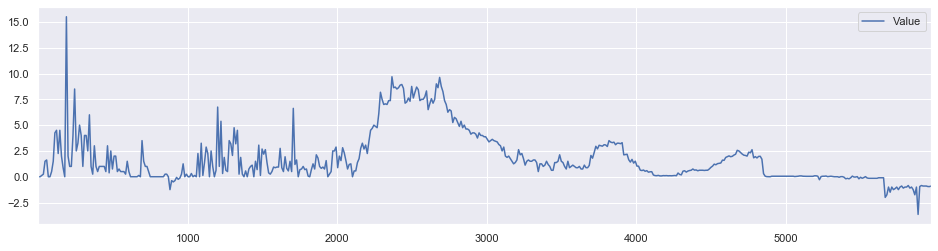

In [150]:
l.plot.line()

In [151]:
# boxplots of all series


In [308]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index(['Date', 'D0'], inplace=True)
df1.sort_index(inplace=True)
df1 = df1.unstack()['Value']
col= ['SARON', '1TGT', '1M', 'EG3M', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', '12M']
df1 = df1[col]

In [265]:
df1.head()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M
Date,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


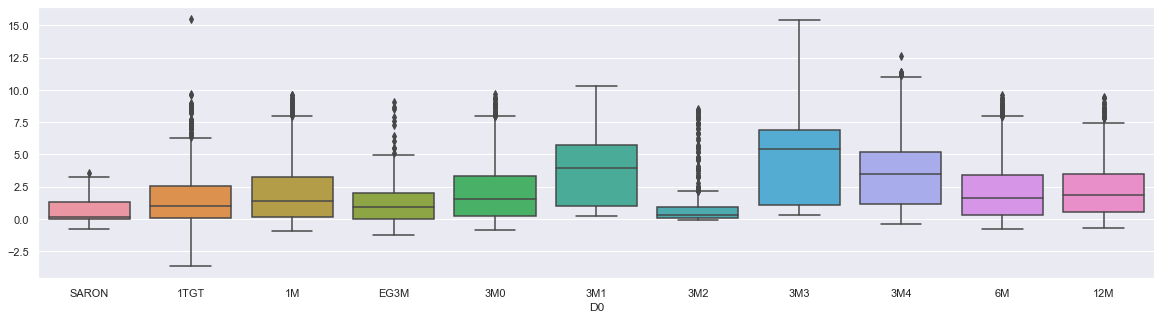

In [263]:
plt.figure(figsize=(20,5))
sns.boxplot(data = df1)

In [109]:
# Scatterplot of 3M0 vs. other 3-month rates: '3M0', 'EG3M'

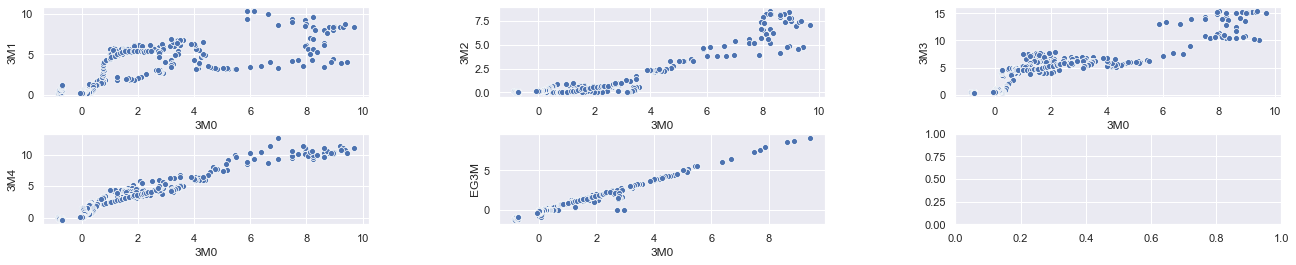

In [143]:
sns.set(rc={'figure.figsize':(16,4)})
f, axes = plt.subplots(2, 3)
plt.subplots_adjust(left=None, bottom=None, right=1.2, top=None, wspace=0.4, hspace=0.4)
sns.scatterplot('3M0', '3M1',data=df1,ax=axes[0,0])
sns.scatterplot( '3M0', '3M2',data=df1, ax=axes[0,1])
sns.scatterplot( '3M0', '3M3',data=df1, ax=axes[0,2])
sns.scatterplot( '3M0', '3M4',data=df1, ax=axes[1,0])
sns.scatterplot( '3M0', 'EG3M',data=df1, ax=axes[1,1])

In [ ]:
 # vertical bar plot of avg 1TGT rates per year

In [170]:
df2=df1.groupby(["Year"])['1TGT'].mean()

[Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017')]

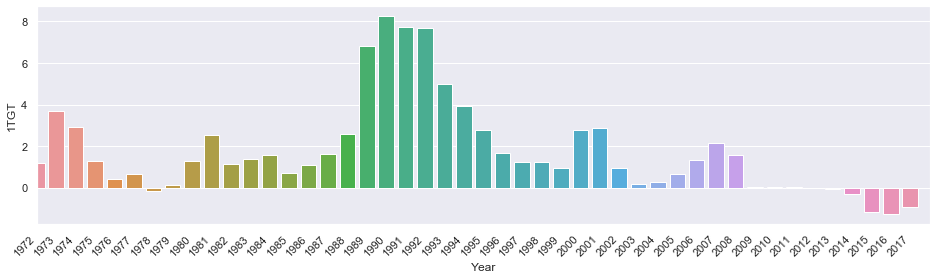

In [200]:
fig, ax = plt.subplots()
chart=sns.barplot(y="1TGT", x="Year", data=df2, ax=ax, orient = 'v')
ax.set_xlim(0, len(df2.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

In [182]:
df2=df2.reset_index()


In [275]:
Year = [t.strftime("%Y")  for t in df1.index]

In [276]:
df1['Year']=Year

In [186]:
df2['Year']=df2['Year'].astype(int)

In [ ]:
# horizontal bar plot of avg 1TGT rates per year

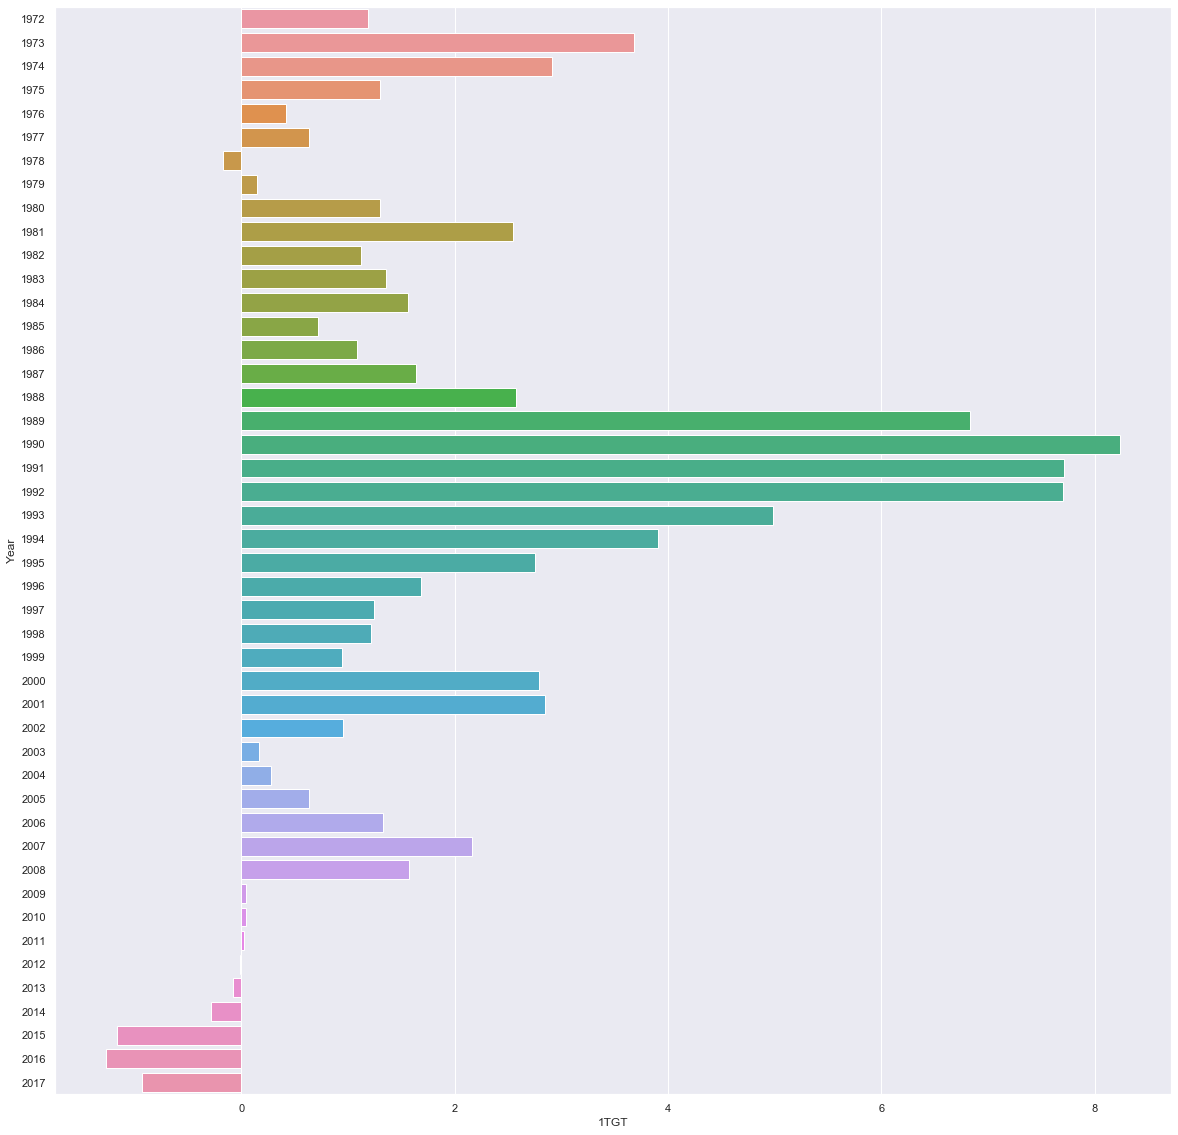

In [218]:
fig, ax = plt.subplots(figsize=(20,20))
chart=sns.barplot(x="1TGT", y="Year", data=df2, ax=ax, orient = 'h')


In [ ]:
ax.set_xlim(0, len(df2.index))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [224]:
 # heatmap of all money-market rates

In [277]:
df1['Year']=df1['Year'].astype(int)

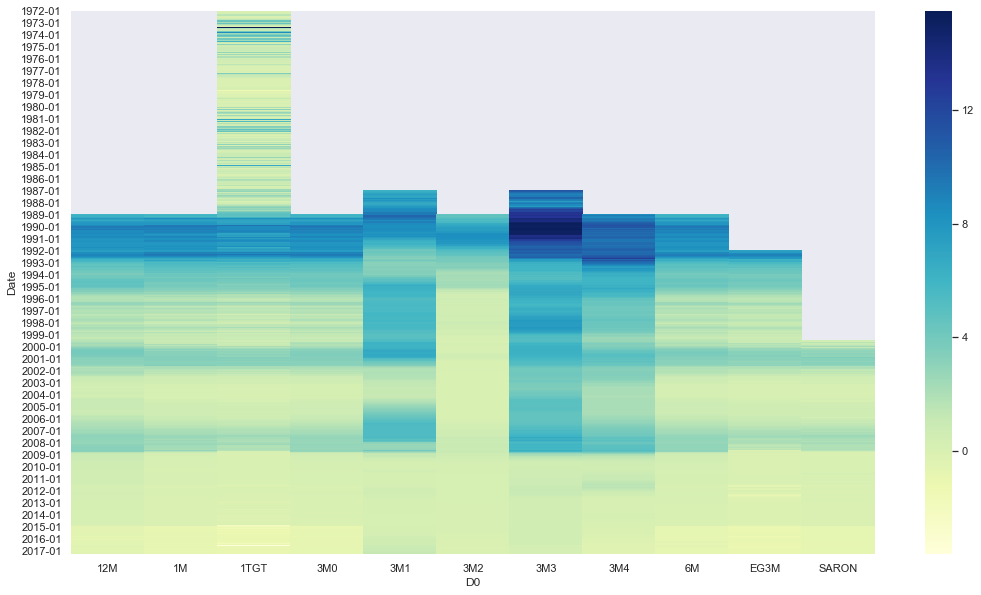

In [231]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
 # Exercise: fix the x labels -- they should be 1Y, 2Y, etc
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df1.index)]
ax = sns.heatmap(df1.drop(['Year'],1), yticklabels=labels, cmap='YlGnBu')


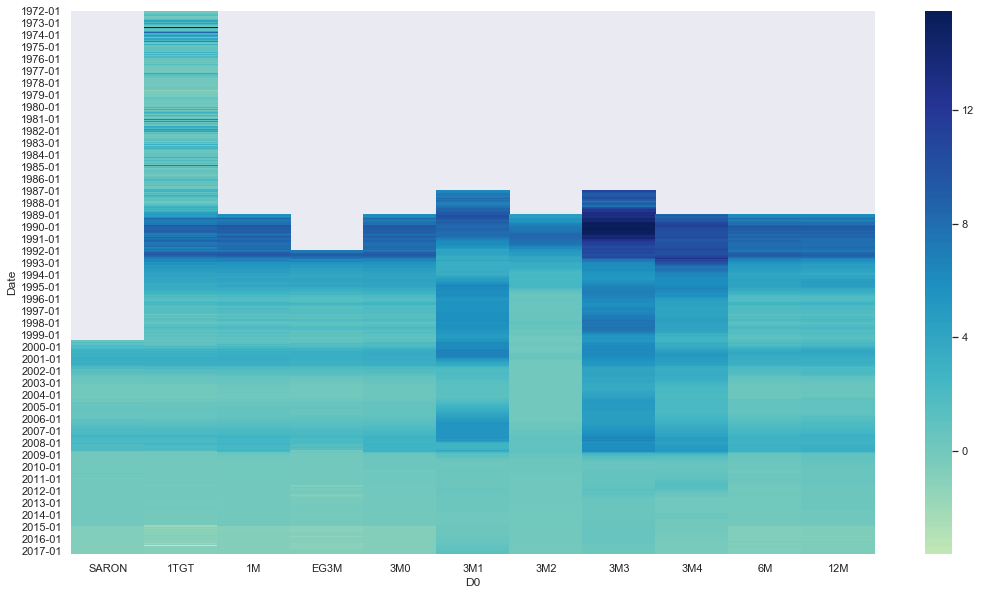

In [267]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
 # Exercise: fix the x labels -- they should be 1Y, 2Y, etc
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df1.index)]
ax = sns.heatmap(df1, yticklabels=labels, center=df1.stack().mean(), cmap='YlGnBu')

In [ ]:
# clustered heatmap of all money-market rates

In [244]:
df1=df1.dropna()

In [254]:
df1.columns

Index(['12M', '1M', '1TGT', '3M0', '3M1', '3M2', '3M3', '3M4', '6M', 'EG3M',
       'SARON', 'Year'],
      dtype='object', name='D0')

In [270]:
df1.dtypes

D0
SARON    float64
1TGT     float64
1M       float64
EG3M     float64
3M0      float64
3M1      float64
3M2      float64
3M3      float64
3M4      float64
6M       float64
12M      float64
dtype: object

In [281]:
df1.head()

D0,SARON,1TGT,1M,EG3M,3M0,3M1,3M2,3M3,3M4,6M,12M,Year
Date,,,,,,,,,,,,
1972-01-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-02-01,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-03-01,NaN,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-04-01,NaN,0.250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972
1972-05-01,NaN,1.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972


In [287]:
df1=df1.dropna()

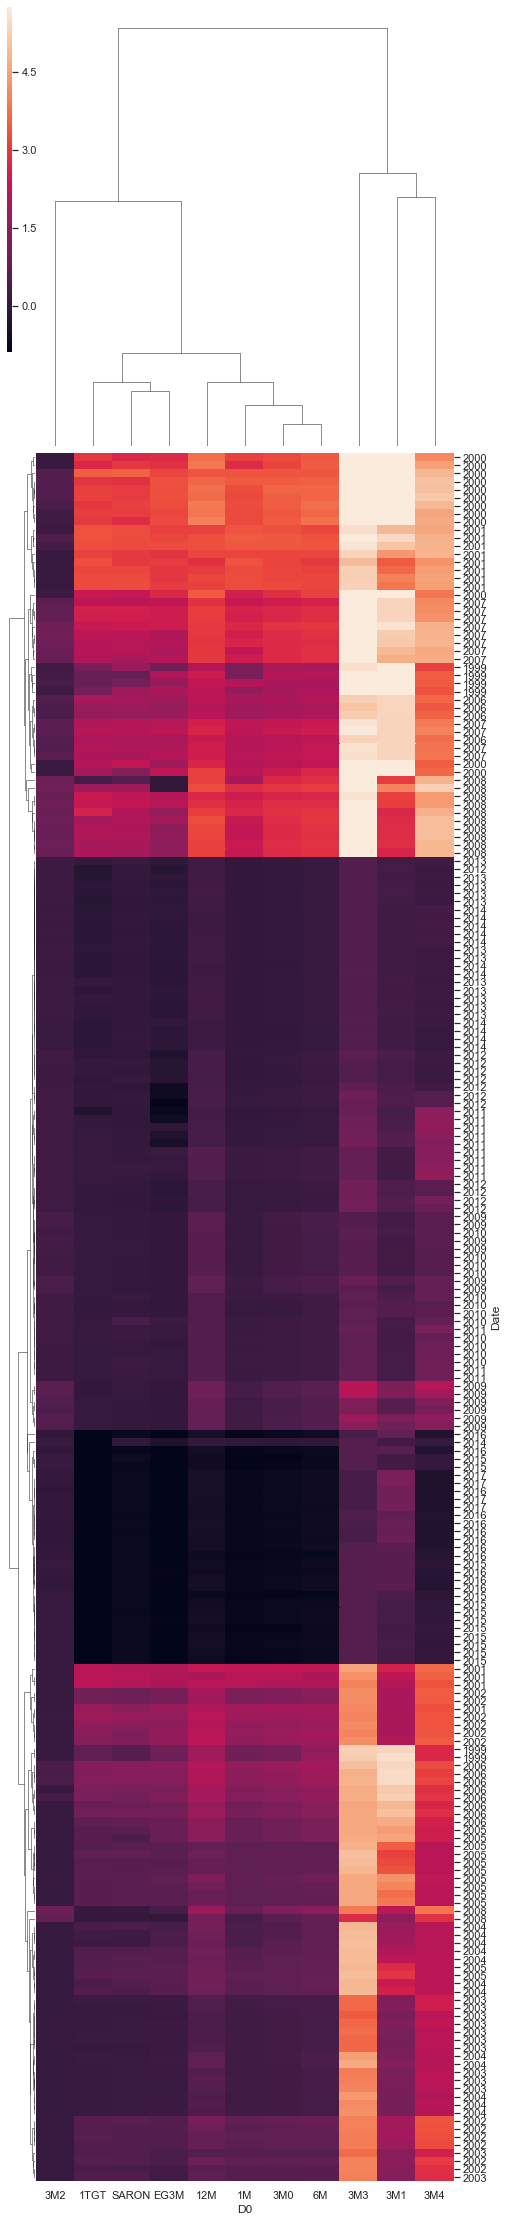

In [288]:
labels = [t.strftime("%Y") for t in df1.index]
cg = sns.clustermap(df1.drop(['Year'],1), yticklabels=labels, robust=True, figsize=(8, 40))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

In [238]:
#sns.clustermap(df1, standardscale=1)

In [ ]:
 # boxplots with outliers

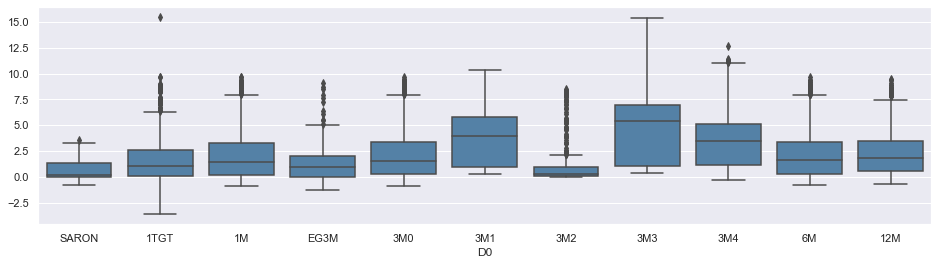

In [309]:
sns.boxplot(data=df1, color='steelblue');

In [ ]:
 # time-series plots of all series

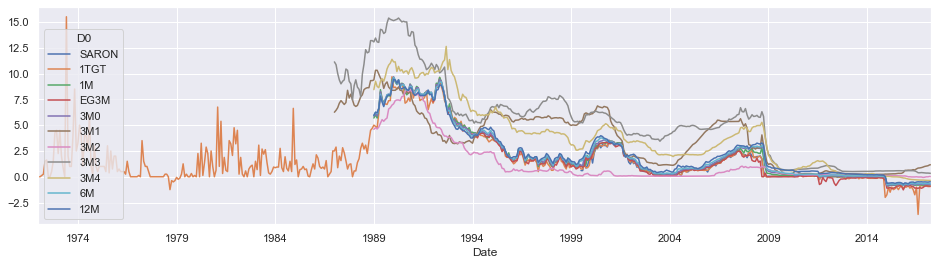

In [310]:
_=df1.plot()

In [ ]:
 # scatter plot of 3M0 vs. EG3M and 3M[1..4] with regression

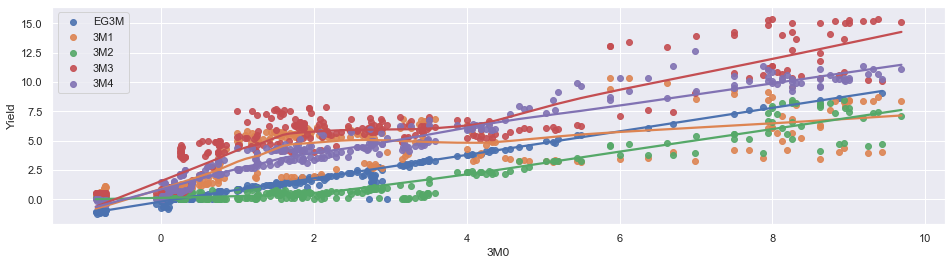

In [300]:
fig, ax = plt.subplots()
scatter_kws = {'alpha': 0.9}
sns.regplot(x='3M0', y='EG3M', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="EG3M")
sns.regplot(x='3M0', y='3M1', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="3M1")
sns.regplot(x='3M0', y='3M2', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="3M2")
sns.regplot(x='3M0', y='3M3', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="3M3")
sns.regplot(x='3M0', y='3M4', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="3M4")
ax.set_ylabel("Yield")
ax.legend()
None

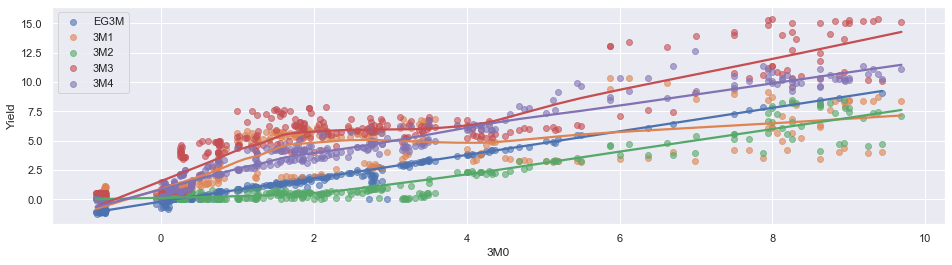

In [301]:
fig, ax = plt.subplots()
scatter_kws = {'alpha': 0.6}
sns.regplot(x='3M0', y='EG3M', lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label="EG3M")
for i in range (1, 5):
    var = '3M{}'.format(i)
    sns.regplot(x='3M0', y=var, lowess=True, data=df1, ax=ax, scatter_kws=scatter_kws, label=var)
ax.set_ylabel("Yield")
ax.legend()
None

In [302]:
 # scatter plot of 3M[0..4] over time with regression
# You might need to use this
import matplotlib.dates as mdates

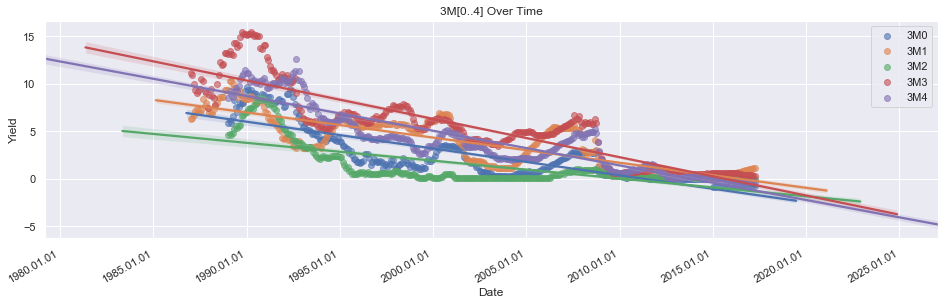

In [303]:
fix, ax = plt.subplots()
df1 = df1.reset_index()
df1['Date'] = df1['Date'].apply(lambda x: mdates.date2num(x))
scatter_kws = {'alpha': 0.6}
for i in range (0, 5):
    var = '3M{}'.format(i)
    sns.regplot(x='Date', y=var, data=df1, ax=ax, scatter_kws=scatter_kws, label=var)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.set_title("3M[0..4] Over Time")
ax.set_ylabel("Yield")
ax.legend()
None